## Project 2: Customer Segmentation

## Objective: 
### Assist a fictitious automobile company in segmenting new potential customers for targeted outreach and communication based on the existing successful segmentation strategy in their current market.  
### This is supervised learning problem

4. Customer Segmentation Modeling:  

    <ins>Objective</ins>: Develop a segmentation model to categorize new potential customers into groups similar to the existing customer segments (A, B, C, D).  
    <ins>Steps</ins>: Define the target variable as "Segmentation" and other relevant features for segmentation modeling.
    Choose an appropriate segmentation algorithm (e.g., k-means clustering).
    Train the model on the existing customer data with known segments (A, B, C, D).
    Apply the trained model to predict segments for the new potential customers.  

5. Segmentation Validation:  

    <ins>Objective</ins>: Validate the segmentation model's effectiveness and assess its performance on the existing dataset.  
    <ins>Steps</ins>: Evaluate the model's performance using relevant metrics (e.g., silhouette score, if using k-means).
    Validate the predicted segments against the known segments in the existing dataset.
    Adjust the model as needed based on validation results.  

6. Interpretation and Profiling:  

    <ins>Objective</ins>: Interpret the characteristics of each customer segment and create customer profiles.  
    <ins>Steps</ins>: Analyze the features that contribute to the segmentation of customers.
    Create detailed profiles for each segment, highlighting the distinguishing characteristics.
    Provide insights into the preferences and behaviors associated with each segment.  

5. Recommendations for Outreach:  

    <ins>Objective</ins>: Provide actionable recommendations for targeted outreach and communication strategies for each customer segment.  
    <ins>Steps</ins>: Based on the identified customer profiles, suggest personalized communication approaches for each segment.
    Highlight specific product offerings or marketing messages that may resonate with each segment.
    Propose strategies for engaging customers in a way that aligns with their segment preferences.  

6. Presentation of Results:  

    <ins>Objective</ins>: Compile and present a comprehensive report for the management team, emphasizing the identified segments and actionable recommendations.  
    <ins>Steps</ins>: Organize key findings, segmentation results, and outreach recommendations into a clear and cohesive report.
    Prepare a visually compelling presentation summarizing the project, showcasing the effectiveness of the segmentation model, and providing strategic guidance for customer outreach in new markets.  

8. Deliverables:  

    <ins>Dataset</ins>: Cleaned and preprocessed dataset.  
    <ins>Analysis Report</ins>: Detailed report showcasing customer segments, behavioral insights, and actionable recommendations.  
    <ins>Machine Learning Model (if applicable)</ins>: Presentation of the developed ML model and its recommendations.  
    <ins>Presentation</ins>: Engaging presentation summarizing key findings and strategies for tailored marketing.  

In [145]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from pandas.plotting import scatter_matrix
import missingno as msno
import plotly.express as px    
import plotly.graph_objects as go

### Stage 1 - Familiarization with the Data  

Objective: Familiarize myself with the dataset provided for the analysis.  
Steps: Clean and preprocess the dataset to ensure accuracy and relevance.  

In [136]:
customer_data = pd.read_csv("Customer_Segmentation_Dataset.csv")
print("              Null Breakdown \n")
print(customer_data.isna().sum().sort_values(ascending=False))
print("\n            Data .info() \n")
print(customer_data.info())
print("\n            Data .describe() \n")
print(customer_data.describe())
print("\n            Segment A .describe() \n")
print(customer_data[customer_data['Segmentation'] == 'A'].describe())
print("\n            Segment B .describe() \n")
print(customer_data[customer_data['Segmentation'] == 'B'].describe())
print("\n            Segment C .describe() \n")
print(customer_data[customer_data['Segmentation'] == 'C'].describe())
print("\n            Segment D .describe() \n")
print(customer_data[customer_data['Segmentation'] == 'D'].describe())
print("\nUnique Professions:", customer_data['Profession'].sort_values().unique(), "\n")
print("Unique Spending Score:", customer_data['Spending_Score'].unique(), "\n")
print("Unique Var_1:", customer_data['Var_1'].sort_values().unique(), "\n")
print("Unique Segmentation:", customer_data['Segmentation'].sort_values().unique(), "\n")
A = customer_data[customer_data['Segmentation'] == 'A'].isna().sum(axis=1)
B = customer_data[customer_data['Segmentation'] == 'B'].isna().sum(axis=1)
C = customer_data[customer_data['Segmentation'] == 'C'].isna().sum(axis=1)
D = customer_data[customer_data['Segmentation'] == 'D'].isna().sum(axis=1)
print("Null Breakdown by Segment:\n")
print("Rows with Nulls in Segment A:", A[A != 0].count())
print("Rows with Nulls in Segment B:", B[B != 0].count())
print("Rows with Nulls in Segment C:", C[C != 0].count())
print("Rows with Nulls in Segment D:", D[D != 0].count())
print("\nRecords per Segment:\n")
print("Rows in Segment A:", customer_data[customer_data['Segmentation'] == 'A'].shape[0])
print("Rows in Segment B:", customer_data[customer_data['Segmentation'] == 'B'].shape[0])
print("Rows in Segment C:", customer_data[customer_data['Segmentation'] == 'C'].shape[0])
print("Rows in Segment D:", customer_data[customer_data['Segmentation'] == 'D'].shape[0])
print("\n% of Rows to Drop per Segment due to Nulls:\n")
print("Segment A:", str(round(A[A != 0].count() / customer_data[customer_data['Segmentation'] == 'A'].shape[0] * 100, 2)) + "%") 
print("Segment B:", str(round(B[B != 0].count() / customer_data[customer_data['Segmentation'] == 'B'].shape[0] * 100, 2)) + "%") 
print("Segment c:", str(round(C[C != 0].count() / customer_data[customer_data['Segmentation'] == 'C'].shape[0] * 100, 2)) + "%") 
print("Segment D:", str(round(D[D != 0].count() / customer_data[customer_data['Segmentation'] == 'D'].shape[0] * 100, 2)) + "%")
#count rows of missing data for each column
print("\n% of Missing Data for Each Column:\n")
missing_number = customer_data.isnull().sum().sort_values(ascending=False)#Calculate percentage of null value
missing_percentage = round(missing_number/len(customer_data) * 100, 2)
missing_info = pd.concat([missing_number, missing_percentage], axis=1, keys=['missing number', 'missing percentage'])
missing_info.head(11)

              Null Breakdown 

Work_Experience    829
Family_Size        335
Ever_Married       140
Profession         124
Graduated           78
Var_1               76
ID                   0
Gender               0
Age                  0
Spending_Score       0
Segmentation         0
dtype: int64

            Data .info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentatio

,missing number,missing percentage
Work_Experience,829,10.28
Family_Size,335,4.15
Ever_Married,140,1.74
Profession,124,1.54
Graduated,78,0.97
Var_1,76,0.94
ID,0,0.00
Gender,0,0.00
Age,0,0.00
Spending_Score,0,0.00


### Visual representation of Nulls

<AxesSubplot:>

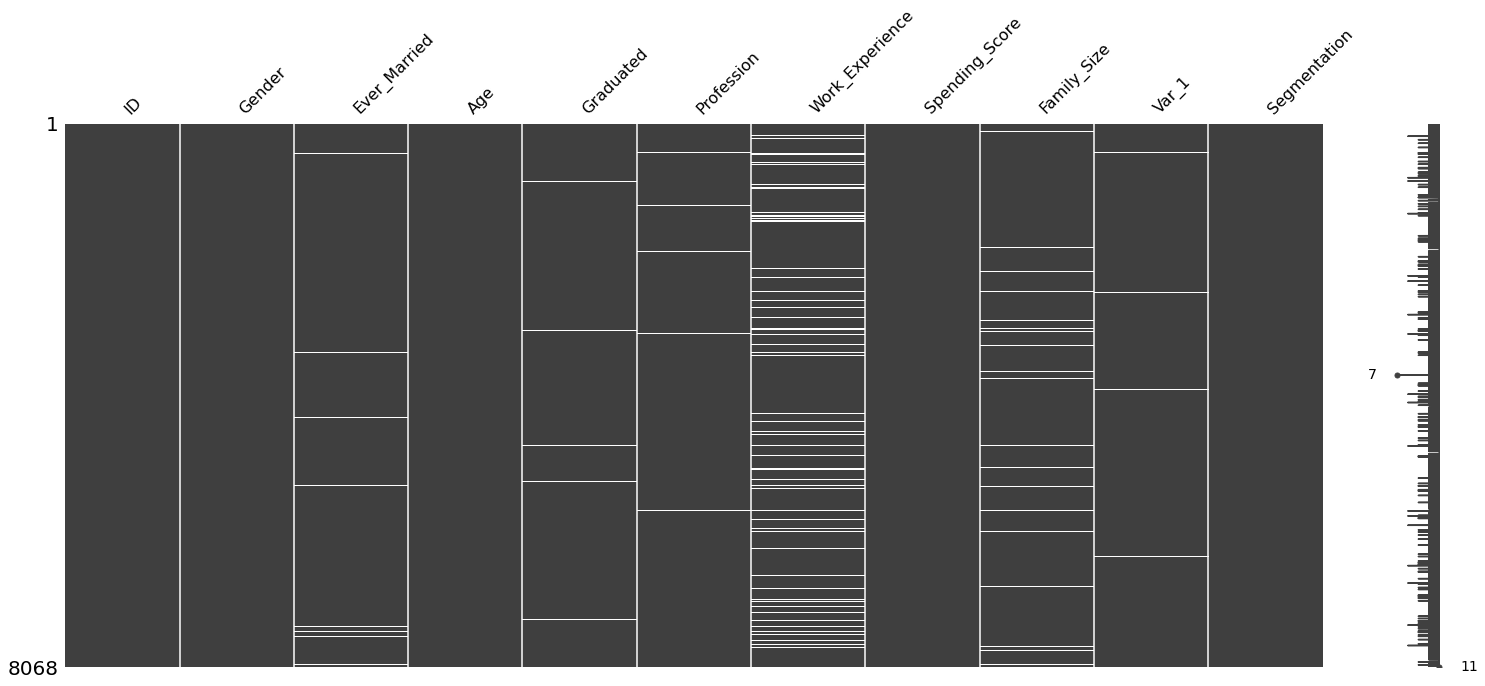

In [52]:
msno.matrix(customer_data)

<AxesSubplot:>

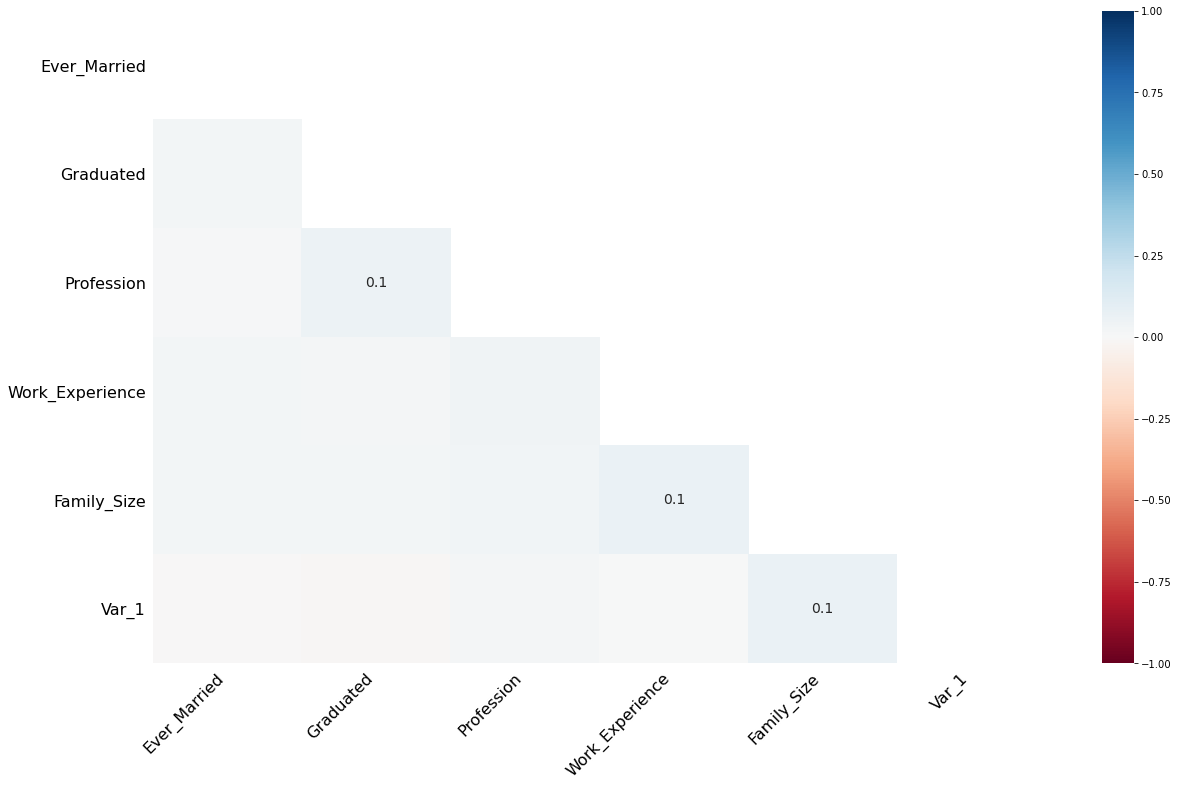

In [103]:
msno.heatmap(customer_data)

### Stage 2 - Exploratory Data Analysis (EDA) 

Objective: Understand the characteristics of the dataset and identify patterns that may influence customer segmentation.  
Steps: Conduct exploratory analysis to grasp the distribution of variables such as gender, marital status, age, education, profession, work experience, spending score, family size, and anonymized category (Var_1).
    Visualize relationships and trends within the dataset to uncover potential insights that may inform customer segmentation.   

In [164]:
eda_data = customer_data.drop(columns='ID')

In [165]:
eda_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [166]:
gender = pd.get_dummies(eda_data['Gender'])
eda_data = pd.concat((eda_data, gender), axis=1)
eda_data.drop(["Female"], axis=1, inplace=True)
eda_data.rename(columns={"Male": "sex"}, inplace=True)
married = pd.get_dummies(eda_data['Ever_Married'])
eda_data = pd.concat((eda_data, married), axis=1)
eda_data.drop(["No"], axis=1, inplace=True)
eda_data.rename(columns={"Yes": "married"}, inplace=True)
grad = pd.get_dummies(eda_data['Graduated'])
eda_data = pd.concat((eda_data, grad), axis=1)
eda_data.drop(["No"], axis=1, inplace=True)
eda_data.rename(columns={"Yes": "grad"}, inplace=True)
eda_data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,sex,married,grad
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,1,0,0
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A,0,1,1
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,0,1,1
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,1,1,1
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A,0,1,1


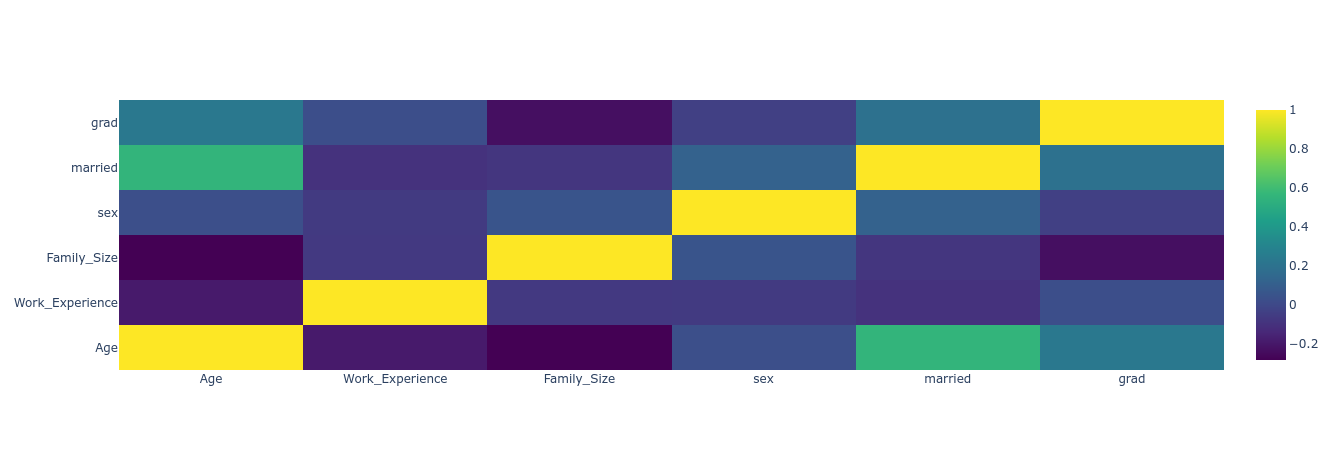

In [182]:
fig = go.Figure(data=go.Heatmap(
                    z=eda_data.corr(),
                    x=eda_data.corr().columns,
                    y=eda_data.corr().columns,
                    colorscale='Viridis'))
fig.show()

Let's take a look at the continuous scatters of age vs work experience / family size
& look at the sex/married/grad count by profession

In [188]:
# df=df.assign(Jittered_Services=df['Services']
#         +np.random.normal(scale=0.49, size=len(df)))
eda_data = eda_data.assign(Jittered_Experience=eda_data['Work_Experience'] + np.random.normal(scale=0.49, size=len(eda_data)))

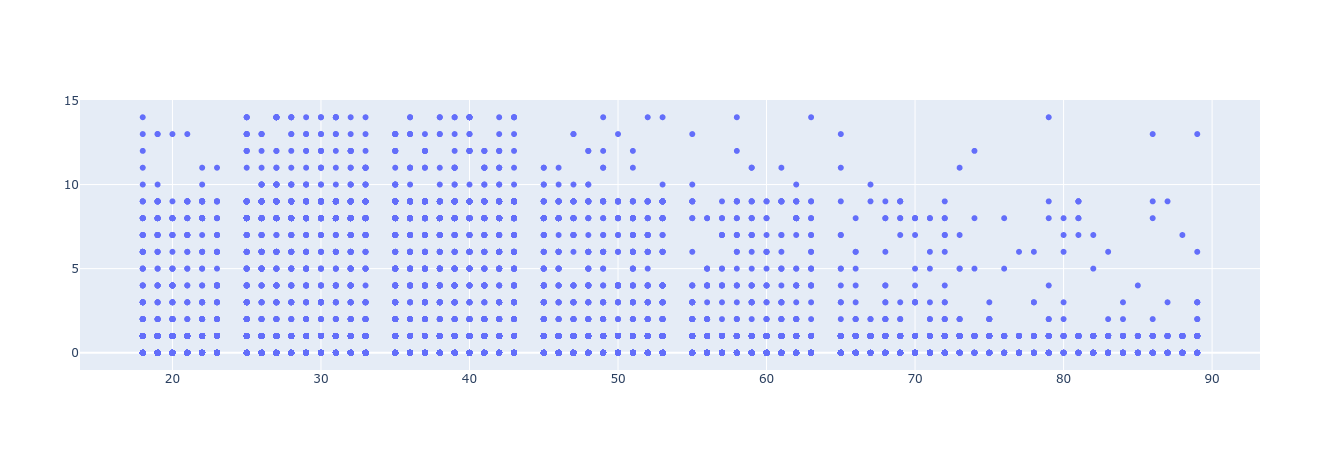

In [189]:
fig = go.Figure(data=go.Scatter(x=eda_data['Age'], y=eda_data['Work_Experience'], mode='markers'))
fig.show()

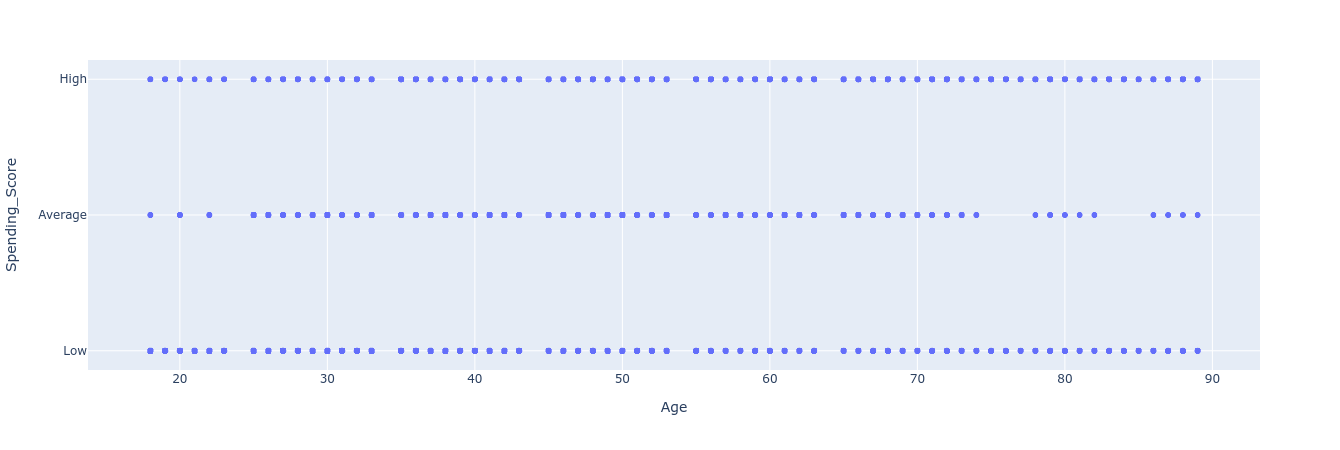

In [191]:
import plotly.express as px

fig = px.scatter(eda_data, x="Age", y="Spending_Score")#, trendline="ols")
fig.show()

In [144]:
eda_data.groupby(['Profession']).describe(include='all')

Gender                                                          \
               count unique     top  freq mean  std  min  25%  50%  75%  max   
Profession                                                                     
Artist          2516      2    Male  1303  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Doctor           688      2    Male   384  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Engineer         699      2  Female   559  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Entertainment    949      2    Male   696  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Executive        599      2    Male   567  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Healthcare      1332      2    Male   775  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Homemaker        246      2  Female   203  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Lawyer           623      2    Male   316  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Marketing        292      2  Female   164  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

              Ever_Married                                                  \
                     count unique  top  freq mean  std  min  25%  50%  75%   
Profession                                                                   
Artist                2487      2  Yes  1774  NaN  NaN  NaN  NaN  NaN  NaN   
Doctor                 677      2   No   366  NaN  NaN  NaN  NaN  NaN  NaN   
Engineer               682      2  Yes   415  NaN  NaN  NaN  NaN  NaN  NaN   
Entertainment          937      2  Yes   579  NaN  NaN  NaN  NaN  NaN  NaN   
Executive              587      2  Yes   550  NaN  NaN  NaN  NaN  NaN  NaN   
Healthcare            1298      2   No  1153  NaN  NaN  NaN  NaN  NaN  NaN   
Homemaker              240      2  Yes   128  NaN  NaN  NaN  NaN  NaN  NaN   
Lawyer                 615      2  Yes   575  NaN  NaN  NaN  NaN  NaN  NaN   
Marketing              285      2   No   189  NaN  NaN  NaN  NaN  NaN  NaN   

                       Age                                                    \
               max   count unique top freq       mean        std   min   25%   
Profession                                                                     
Artist         NaN  2516.0    NaN NaN  NaN  46.327504  11.969247  18.0  38.0   
Doctor         NaN   688.0    NaN NaN  NaN  37.225291  12.134741  18.0  28.0   
Engineer       NaN   699.0    NaN NaN  NaN  41.745351  12.178982  19.0  32.0   
Entertainment  NaN   949.0    NaN NaN  NaN  43.005269  13.316932  18.0  33.0   
Executive      NaN   599.0    NaN NaN  NaN  51.096828  15.668834  18.0  39.0   
Healthcare     NaN  1332.0    NaN NaN  NaN  26.827327   7.809831  18.0  21.0   
Homemaker      NaN   246.0    NaN NaN  NaN  37.922764  11.969269  20.0  29.0   
Lawyer         NaN   623.0    NaN NaN  NaN  75.215088  10.249553  20.0  70.0   
Marketing      NaN   292.0    NaN NaN  NaN  36.818493  14.054310  18.0  26.0   

                                Graduated                                   \
                50%   75%   max     count unique  top  freq mean  std  min   
Profession                                                                   
Artist         45.0  53.0  89.0      2502      2  Yes  2209  NaN  NaN  NaN   
Doctor         35.0  43.0  89.0       683      2  Yes   395  NaN  NaN  NaN   
Engineer       40.0  50.0  81.0       695      2   No   385  NaN  NaN  NaN   
Entertainment  41.0  51.0  89.0       937      2  Yes   592  NaN  NaN  NaN   
Executive      50.0  61.0  89.0       594      2  Yes   300  NaN  NaN  NaN   
Healthcare     26.0  31.0  86.0      1320      2   No   844  NaN  NaN  NaN   
Homemaker      35.0  43.0  85.0       244      2  Yes   138  NaN  NaN  NaN   
Lawyer         77.0  83.0  89.0       611      2  Yes   381  NaN  NaN  NaN   
Marketing      33.0  45.0  89.0       287      2   No   173  NaN  NaN  NaN   

                                  Work_Experience                            \
               25%  50%  75%  max           count unique top freq      mean   
Profession                                                  

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Work_Experience', ylabel='Age'>,
        <AxesSubplot:xlabel='Family_Size', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Work_Experience'>,
        <AxesSubplot:xlabel='Work_Experience', ylabel='Work_Experience'>,
        <AxesSubplot:xlabel='Family_Size', ylabel='Work_Experience'>],
       [<AxesSubplot:xlabel='Age', ylabel='Family_Size'>,
        <AxesSubplot:xlabel='Work_Experience', ylabel='Family_Size'>,
        <AxesSubplot:xlabel='Family_Size', ylabel='Family_Size'>]],
      dtype=object)

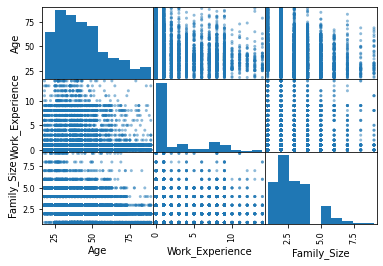

In [146]:
# features = ["total_rooms", "population", "households", "median_house_value"]
# scatter_matrix(housing[features], figsize=(12, 8))
scatter_matrix(eda_data)

In [ ]:
data_A = data[data['Segmentation'] == "A"]
data_B = data[data['Segmentation'] == "B"]
data_C = data[data['Segmentation'] == "C"]
data_D = data[data['Segmentation'] == "D"]

Need to assign imputation of data to the columns Ever_Married, Graduated, Profession, Work_Experience, Family_Size, and Var_1 where possible. Probably need to segment data by Segmentation and then by other columns as much as possible in order to attempt accurate imputation.

### Stage 3 - Data Preprocessing    

Objective: Prepare the dataset for segmentation modeling by handling missing values and encoding categorical variables.  
Steps: Address any missing or inconsistent data points.
    Encode categorical variables, such as gender, marital status, education, profession, and Var_1, to make them suitable for segmentation modeling.  

In [ ]:
### The nature of the data 

In [46]:
customer_data_cleaned = customer_data.dropna()
customer_data_cleaned.to_csv("Customer_Segmentation_Dataset_DropedNA.csv")